### Predicting the likelihood of e-signing a loan based on financial history

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
dataset = pd.read_csv('P39-Financial-Data.csv')
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
# shape of data
dataset.shape

(17908, 21)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

In [5]:
# Missing values
dataset.isnull().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

There are no missing values.

### Exploratory Analysis

#### Histograms

In [6]:
# taking only numerical imput features
dataset2 = dataset.drop(['entry_id', 'pay_schedule','e_signed'], axis = 1)

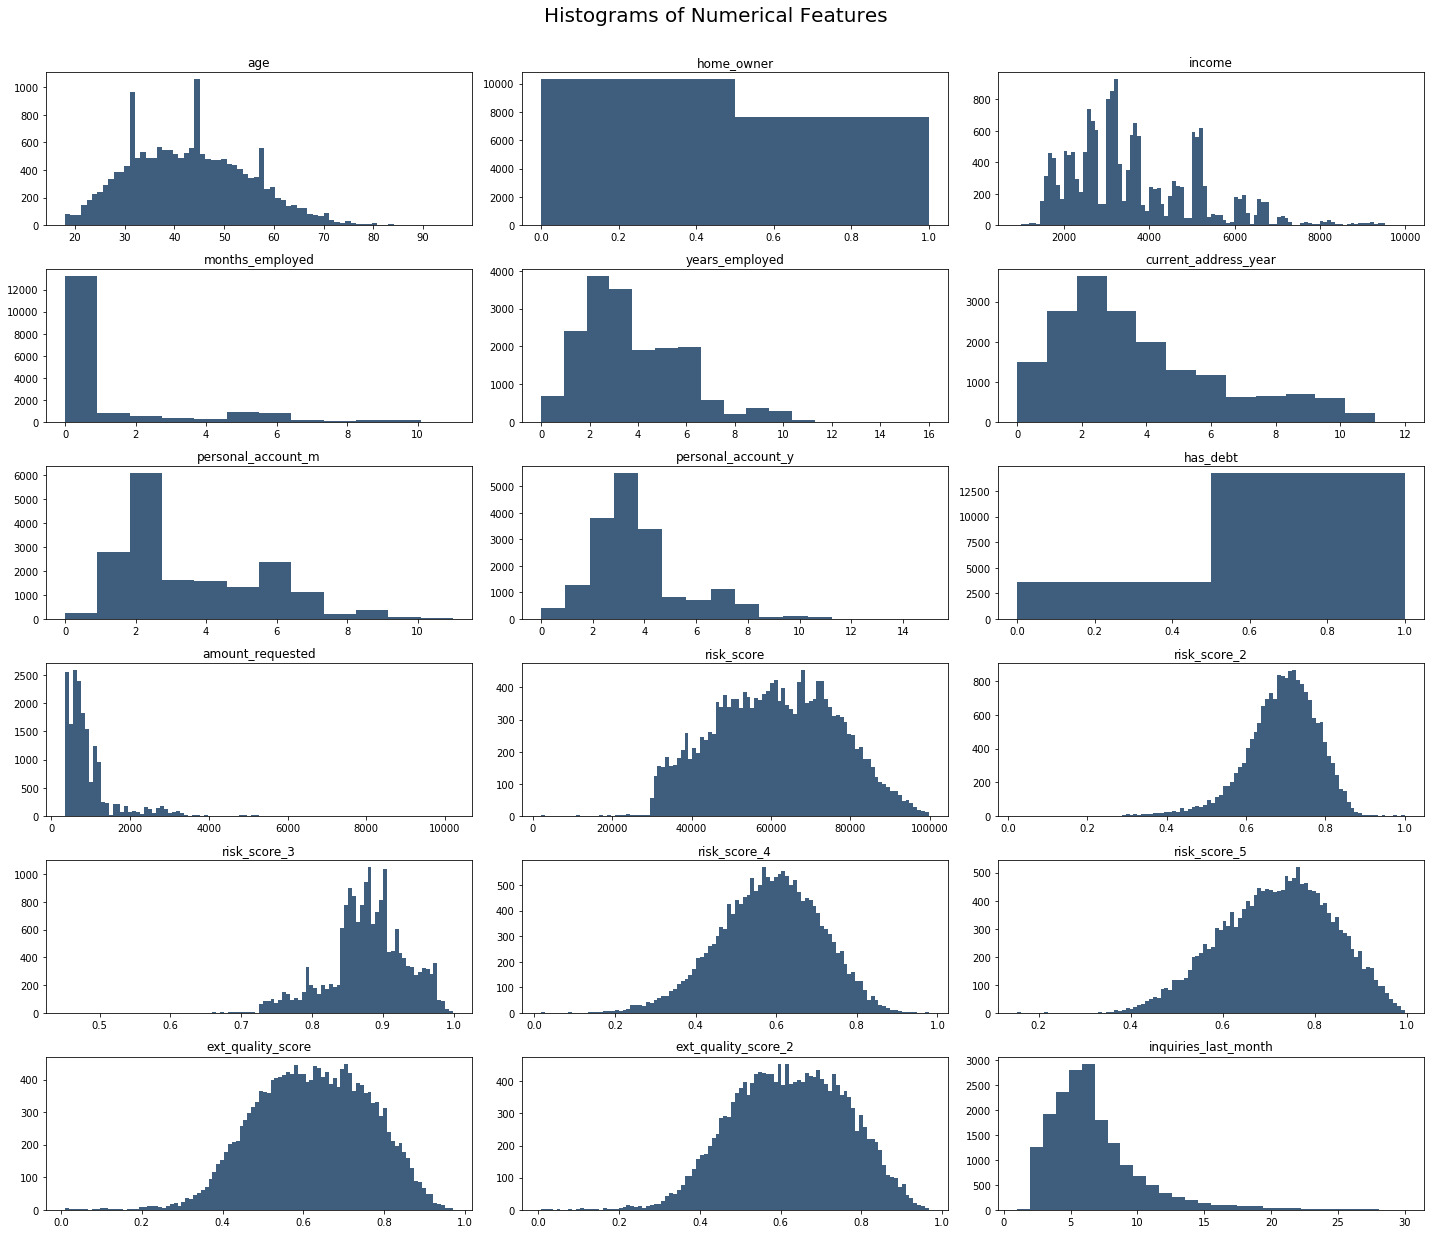

In [7]:
fig = plt.figure(figsize=(20,18))
plt.suptitle('Histograms of Numerical Features', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    # control the bins
    vals = len(dataset2.iloc[:,i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins = vals, color = "#3F5D7D")
    
plt.tight_layout(rect = [0,0.03,1,0.95])

#### Correlation with the Response feature - e_signed

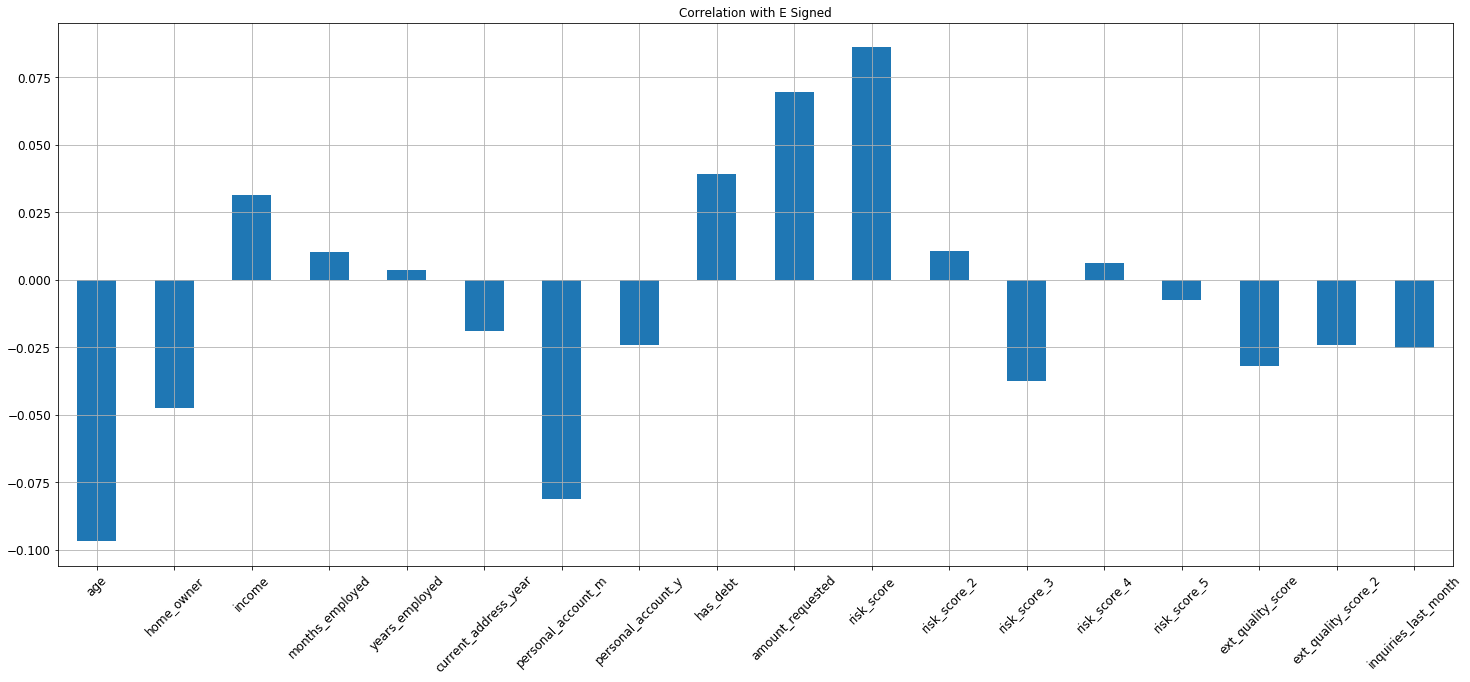

In [8]:
dataset2.corrwith(dataset.e_signed).plot.bar(figsize = (25,10),
                                           title = "Correlation with E Signed", fontsize = 12,
                                           rot = 45, grid = True)

#### Correlation Matrix

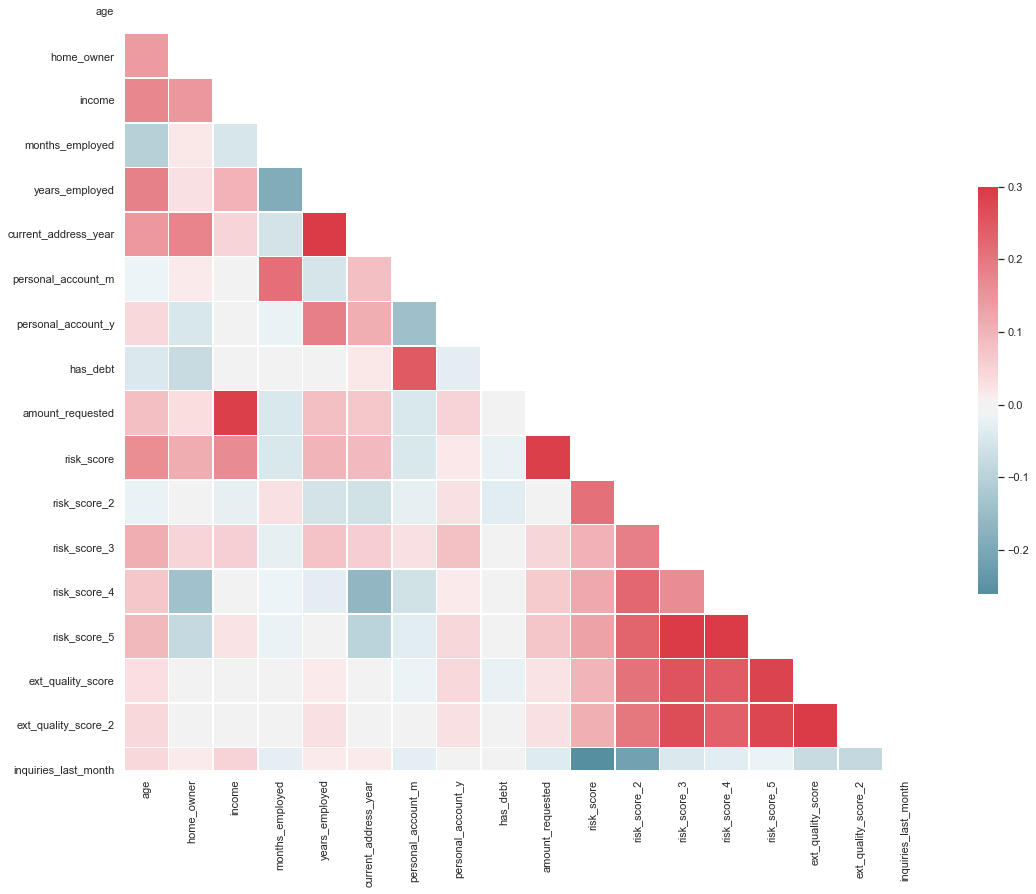

In [9]:
# compute correlation matrix
cor_mat = dataset2.corr()

# Generate mask for the upper traingle
mask = np.zeros_like(cor_mat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the correlation matirx
sns.set(style='white')
cmap = sns.diverging_palette(220,10, as_cmap = True)

plt.figure(figsize=(18,15))
sns.heatmap(cor_mat, mask = mask, cmap = cmap, vmax=0.3, center=0, square = True, linewidths=.5, cbar_kws={'shrink':.5})


### Feature Engineering

In [10]:
import random
import time
random.seed(100)

As seen from the histogram months_employed feature was not matching to years_employed and it looked like there was some error, so we will drop it.

In [11]:
dataset = dataset.drop('months_employed', axis = 1)

Features personal_account_y and personal_account_m represents the time the customer has had the account in year and months respectively (eg: 2 years and 4 months). So, we combine them to a single feature representing the total time in months.

In [12]:
# combning the features personal_account_m and personal_account_y
dataset['personal_account_months'] = dataset['personal_account_m']+ (dataset['personal_account_m'] * 12)

# drop the original columns
dataset.drop(['personal_account_m','personal_account_y'], axis = 1, inplace = True)

### Data Preprocessing

#### One hot Encoding

In [13]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [14]:
dataset.head()

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.737398,...,0.487712,0.515977,0.580918,0.380918,10,1,78,0,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.738510,...,0.713423,0.826402,0.730720,0.630720,9,0,26,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.642993,...,0.595018,0.762284,0.531712,0.531712,7,0,91,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.665224,...,0.767828,0.778831,0.792552,0.592552,8,1,26,0,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.617361,...,0.613487,0.665523,0.744634,0.744634,12,0,26,0,1,0


In [15]:
# Creating input and target features
response = dataset['e_signed']
input_df = dataset.drop(['e_signed','entry_id'], axis = 1)

In [16]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_df, response, test_size = 0.2, random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = input_df.columns.values )
X_test = pd.DataFrame(scaler.transform(X_test),columns = input_df.columns.values)

C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [18]:
X_train

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,-0.005991,-0.856349,-0.242358,-1.567782,-0.573557,0.507058,-0.642580,-1.905162,-1.190501,-0.766112,0.979893,-0.229380,-1.060059,-1.057386,1.784494,1.162481,-0.302360,-0.356075,1.976827
1,-0.509890,-0.856349,-0.052592,0.206559,-0.937970,0.507058,-0.785621,-0.749184,1.254553,0.607772,-0.396208,0.823356,0.041801,-0.672086,-0.663369,-0.190159,3.307315,-0.356075,-0.505861
2,-0.761840,1.167748,-0.412149,-1.124197,-0.937970,-1.972161,-0.642580,-1.437575,0.532590,-1.485619,-0.086860,-0.775633,0.588358,-0.841550,1.240525,-0.641039,-0.302360,-0.356075,-0.505861
3,1.421722,1.167748,-0.638537,0.650144,2.341745,0.507058,-0.785621,-0.680994,-0.642460,1.696278,-1.252980,-1.027524,1.532749,0.817422,-0.119399,0.260721,-0.302360,-0.356075,-0.505861
4,-1.601671,-0.856349,-1.041374,1.093729,2.341745,0.507058,-0.499539,0.780214,-0.248764,-0.315136,-0.910402,0.225551,0.108871,1.541402,-0.935353,1.162481,-0.302360,-0.356075,-0.505861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14321,0.749857,-0.856349,-0.418808,0.650144,-0.209144,0.507058,-0.499539,-0.294586,0.745302,0.013594,0.373144,1.218247,-1.192116,-1.189316,-0.119399,1.162481,-0.302360,-0.356075,1.976827
14322,-1.181756,1.167748,-1.311042,-0.237027,-0.573557,0.507058,-0.356498,-0.447201,0.032793,-0.501895,0.380844,-1.246395,0.046706,1.479297,-0.391384,0.711601,-0.302360,-0.356075,-0.505861
14323,0.161975,-0.856349,-0.465417,-0.680612,-0.937970,0.507058,-0.714101,-1.817490,-0.407938,0.239595,0.375016,0.221194,-1.444564,-1.441521,0.424570,-1.542799,-0.302360,-0.356075,-0.505861
14324,1.085790,-0.856349,-0.698463,2.424485,1.612919,-1.972161,2.504320,-0.882316,-0.293826,0.034345,1.056861,0.992394,0.131173,0.848189,-0.663369,-0.641039,-0.302360,2.808398,-0.505861


### Modeling

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l1', random_state=0)
classifier.fit(X_train, y_train)

C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
# predicting on test set
y_pred = classifier.predict(X_test)
#y_pred_prob = classifier.predict_proba(X_test)[:,1]

In [21]:
# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#auc = roc_auc_score(y_test, y_pred_prob)

results = pd.DataFrame([['Linear Regression (lasso)', acc, prec, recall, f1]], 
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
results

,Model,Accuracy,Precision,Recall,F1_Score
0,Linear Regression (lasso),0.573981,0.585678,0.712656,0.642957


#### Support Vector machine

In [22]:
from sklearn.svm import SVC

# linear svm
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
# predicting on test set
y_pred = classifier.predict(X_test)
#y_pred_prob = classifier.predict_proba(X_test)[:,1]

In [24]:
# Evaluation

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svm_linear_results = pd.DataFrame([['Support Vector Machine(Linear)', acc, prec, recall, f1]], 
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

results = results.append(svm_linear_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1_Score
0,Linear Regression (lasso),0.573981,0.585678,0.712656,0.642957
1,Support Vector Machine(Linear),0.578169,0.587129,0.728734,0.650312


In [25]:
# Kernel Svm
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
# predicting on test set
y_pred = classifier.predict(X_test)

In [27]:
# Evaluation

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svm_rbf_results = pd.DataFrame([['Support Vector Machine(RBF)', acc, prec, recall, f1]], 
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

results = results.append(svm_rbf_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1_Score
0,Linear Regression (lasso),0.573981,0.585678,0.712656,0.642957
1,Support Vector Machine(Linear),0.578169,0.587129,0.728734,0.650312
2,Support Vector Machine(RBF),0.604411,0.615246,0.707469,0.658142


#### Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
# predicting on test set
y_pred = classifier.predict(X_test)

In [30]:
# Evaluation

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rf_results = pd.DataFrame([['Random Forest (100)', acc, prec, recall, f1]], 
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

results = results.append(rf_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1_Score
0,Linear Regression (lasso),0.573981,0.585678,0.712656,0.642957
1,Support Vector Machine(Linear),0.578169,0.587129,0.728734,0.650312
2,Support Vector Machine(RBF),0.604411,0.615246,0.707469,0.658142
3,Random Forest (100),0.626186,0.642202,0.689834,0.665166


So far Random Forest mode is performing the best. We will apply cross validation to validate the results.

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X = X_train, y =  y_train, cv = 10)


In [32]:
acc_mean = round(accuracies.mean(),2)
acc_std = round(accuracies.std() * 2 ,2)
print(f'Random Forest Accuracy: {acc_mean} (+/- {acc_std})')

Random Forest Accuracy: 0.62 (+/- 0.03)


### Grid Search with Random Forest

In [33]:
from sklearn.model_selection import GridSearchCV

In [37]:
# parameters list
parameters = {'max_depth':[3, 5],
             'max_features': [1, 5, 10],
             'min_samples_split': [2,5,10],
             'min_samples_leaf':[1, 5, 10],
             'criterion': ['entropy','gini']}

grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)

In [38]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5], 'max_features': [1, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
# Best Parameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [40]:
# best score
grid_search.best_score_

0.6177579226581041

In [42]:
# AUC score
y_prob = classifier.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)

0.6797260319507091

We will further perform another round of grid search with values near to the best parameters we got from the first grid search.

In [43]:
parameters = {'max_depth':[5,7,8],
             'max_features': [4,5,7],
             'min_samples_split': [2,5,10],
             'min_samples_leaf':[1,2,3],
             'criterion': ['gini']}

grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 7, 8], 'max_features': [4, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
# best parameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

We now have different parametners for max depth and max features as the best parameters.

In [47]:
# best score
grid_search.best_score_

0.6298338684908558

In [52]:
# AUC score
classifier = grid_search.best_estimator_
y_prob = classifier.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)

0.6859816137917885

We also now have better accuracy and auc score.

### Prediction vs Actual Class

In [68]:
pd.set_option('display.max_rows', None)

y_pred = classifier.predict(X_test)

results = pd.DataFrame(y_test)
results['Predicted'] = y_pred
results = results.reset_index(drop = True)
results.columns = ['Actual', 'Predicted']

results

,Actual,Predicted
0,1,0
1,1,1
2,0,1
3,1,1
4,1,1
5,1,0
6,1,0
7,1,1
8,1,1
9,1,0
